# Homework 5

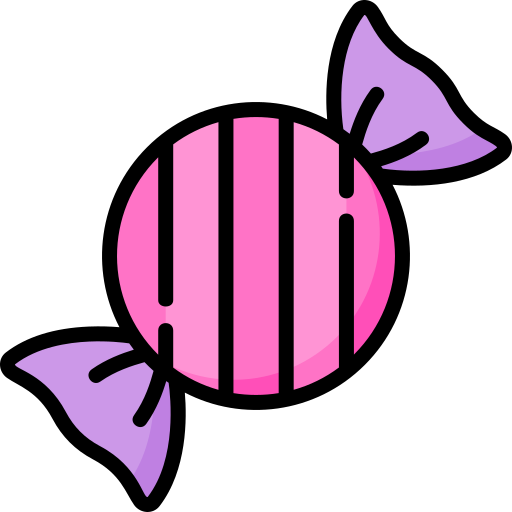

### Goal:
The purpose of this homework was to predict diabetes given a few features such as BMI, blood pressure, age, etc...

### Background Research:
Not applicable here as the instructions were fairly clear

### Import Dependencies

In [66]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

### Read in the Data and Show

In [67]:
df = pd.read_csv('Diabetes/diabetes.csv')
df.head()

,timesPreg,Glucose,blood pressure,triceps skin fold thickness,2hr-serum-insulin,BMI,Diabetes pedigree fnc,age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


### Create Training Feature Array and Label Array

In [68]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[: , -1].apply(lambda r: 1 if r == 'tested_positive' else 0)
y = y.to_numpy()

### Perform KFold Validation on Naive Bayes Classifier

In [69]:
kf = KFold(n_splits=10)
scores = []
for train, test in kf.split(X, y):
    gnb = GaussianNB()
    gnb.fit(X[train], y[train])
    scores.append(gnb.score(X[test], y[test]))
    
print(f"Accuracy: {sum(scores) / len(scores)}")

Accuracy: 0.7551777170198223


### Show Accuracy Across Folds

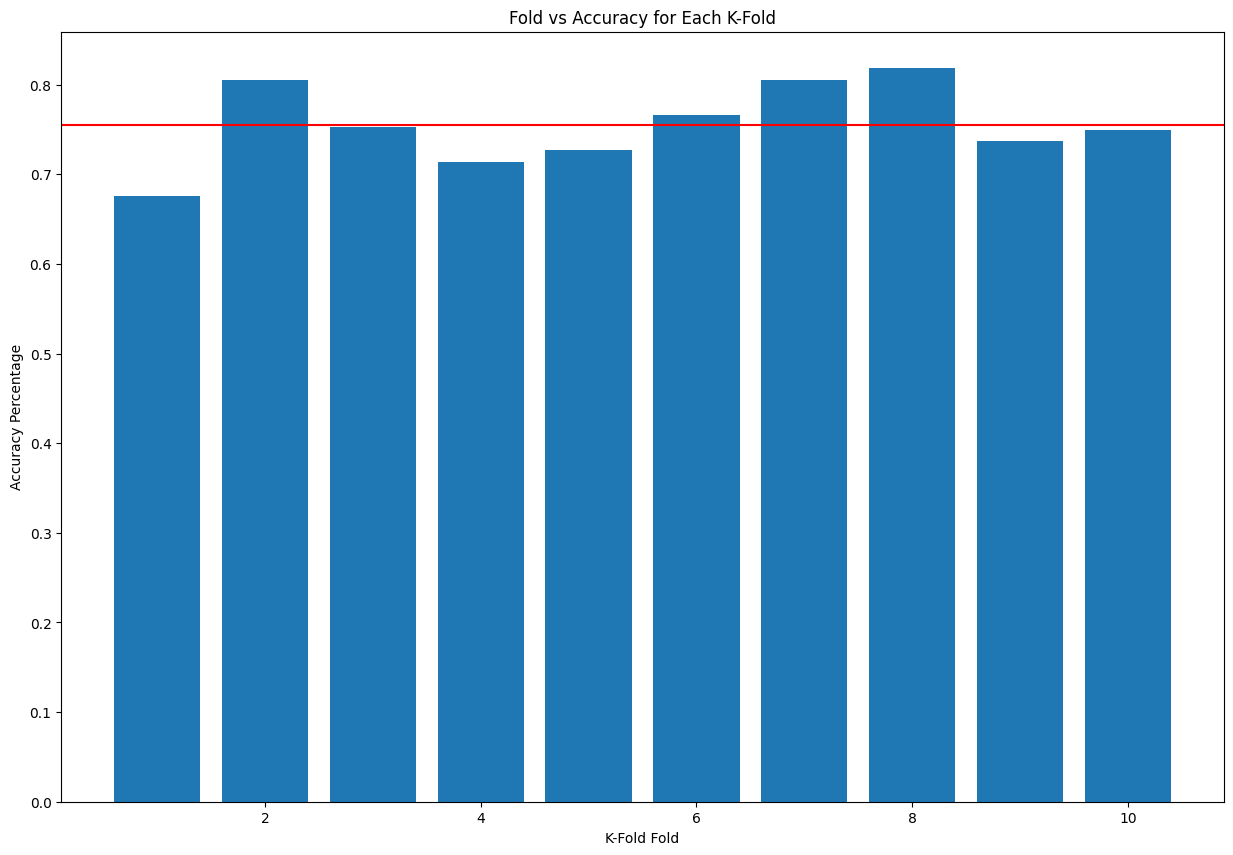

In [74]:
idx = np.linspace(1, 10, 10).tolist()
fig = plt.figure(figsize=(15,10))
plt.title('Fold vs Accuracy for Each K-Fold')
plt.ylabel('Accuracy Percentage')
plt.xlabel('K-Fold Fold')
plt.bar(idx, scores)
plt.axhline(sum(scores)/len(scores), color='r')

### Analysis

It appears that a Naive Bayes classifier is not the worst model for predicting diabetes given the input features. with an overall accuracy across the folds of 75.5% it is certainly better than the coinflip odds of 50/50.